# **ASSET PRICING**

## Importing and Installing packages

In [0]:
from numpy import *
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [0]:
# varying Sigma values to check the difference for Barrier option
sig=[0.18,0.2,0.22]

In [0]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = [12,52,365]
numPaths = 10000
timetype=['Monthly','Weekly','Daily']

## <b> Black–Scholes Model

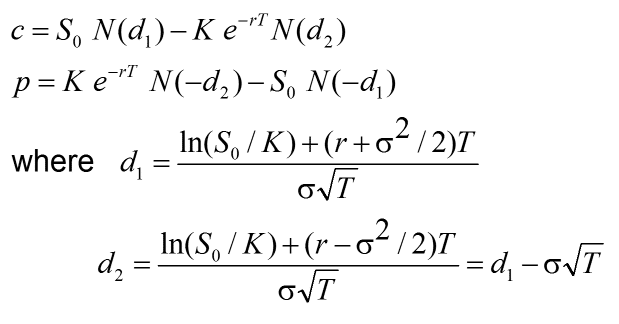

In [0]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
  """
    Computes option prices for Call and Put options using Black Scholes Model
    
    Args:
        T: is the total length of time for the path (in years).
        S0: Spot price for underlying stock today
        K: Strike at expiry
        r: Risk Free Rate
        sigma: Volatility

    Returns:
        European Call and Put option prices
  """

  t = 0 #as the S0 is at time, t = 0
  #First calculating d1 and d2 as these are common varaibles needed for both
  d1 = (1/(sigma*sqrt(T-t)))*((log(S0/K)) + (r + ((np.power(sigma,2)/2)*(T - t))))
  d2 = d1 - sigma*sqrt(T-t)
  #calculating call option price from formula mentioned in assingment
  c = norm.cdf(d1)*S0 - norm.cdf(d2)*K*exp(-r*(T-t))
  #calculating put option price from formula mentioned in assingment
  p = norm.cdf(-d2)*K*exp(-r*(T-t))-norm.cdf(-d1)*S0
  # --------- Insert your code here --------- #
  return c, p

## Geometric Random Walks

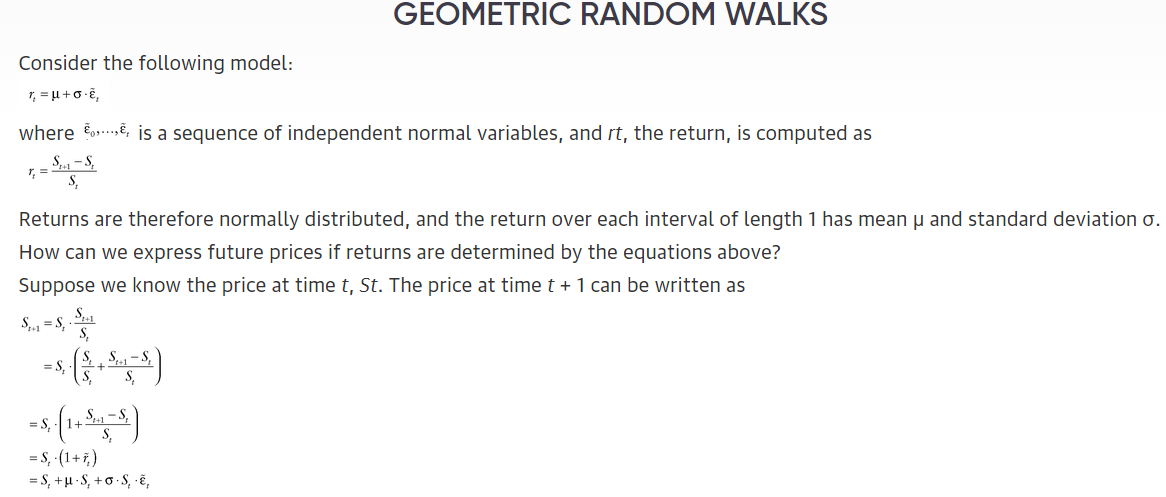

In [0]:
def GRW(S0,T,mu,sigma,numSteps,numPaths):
  """
    Computes numPaths random paths for a geometric random walk.
    
    Args:
        S0: Spot price for underlying stock today
        sigma: Volatility
        mu: is the annual drift, sigma the annual volatility
        T: is the total length of time for the path (in years)
    Returns:
        random paths for a geometric random walk.
    """   
  paths = np.zeros((numSteps+1, numPaths))
  dT = T/numSteps
  paths[0,:]=S0
  for i in range(numPaths):
    for j in range(numSteps):
      paths[j+1,i]=paths[j, i] * np.exp( (mu - 0.5*(np.power(sigma,2)))*dT + (sigma*np.sqrt(dT)*np.random.normal(0,1)))
# Plot paths
  if (numSteps==12):
    t="Monthly"
  elif (numSteps==52):
    t='Weekly'
  elif (numSteps==365):
    t="Daily"
  elif (numSteps==8760):
    t='Hourly'
  else:
    t="Annual"
  plt.figure(figsize=(8,8))
  [plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
  plt.title('Geometric Random Walk Paths with volatility =' + str(sigma),fontsize=20)
  plt.xlabel('Time steps of a year -' + str(t),fontsize=20)
  plt.ylabel("Price of the asset in $",fontsize=20)
  return paths

## Monte Carlo Simulations - European Option

In [0]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
  """
    Computes option prices for Call and Put options using Monte Carlo Simulations
    
    Args:
        T: is the total length of time for the path (in years).
        S0: Spot price for underlying stock today
        K: Strike at expiry
        r: Risk Free Rate
        sigma: Volatility
        mu: is the annual drift, sigma the annual volatility

    Returns:
        European Call and Put option prices
    """
  S=GRW(S0,T,mu,sigma,numSteps,numPaths)
  PutPayoffT = np.maximum(K - S[-1,:], 0)
  #Calculate the payoff for each path for a Call
  CallPayoffT = np.maximum(S[-1,:]- K, 0)
  #Discount back
  p= np.mean(PutPayoffT)*exp(-r*T)
  c= np.mean(CallPayoffT)*exp(-r*T)
    
  return c, p

## Monte Carlo Simulations - Barrier Option

In [0]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
  """
    Computes option prices for  Barrier Knock-in Call and Put options using Monte Carlo Simulations
    
    Args:
        T: is the total length of time for the path (in years).
        S0: Spot price for underlying stock today
        K: Strike at expiry
        r: Risk Free Rate
        sigma: Volatility
        mu: is the annual drift, sigma the annual volatility
        Sb: Barrier price

    Returns:
        Barrier Call and Put option prices
    """
  S=GRW(S0,T,mu,sigma,numSteps,numPaths)
  PutPayoffT=np.zeros(numPaths)
  CallPayoffT=np.zeros(numPaths)
  for i in range(numPaths):
        if np.amax(S[:,i])<Sb: 
            CallPayoffT[i] = 0
            PutPayoffT[i] = 0
        else: 
            CallPayoffT[i] = np.maximum(S[-1,i] - K, 0)
            PutPayoffT[i] = np.maximum(K - S[-1,i], 0) 
             
  #Discount back
  p= np.mean(PutPayoffT)*exp(-r*T)
  c= np.mean(CallPayoffT)*exp(-r*T)

  return c, p

## Computations and Plots

In [0]:
# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price (S0, K, T, r, sigma)

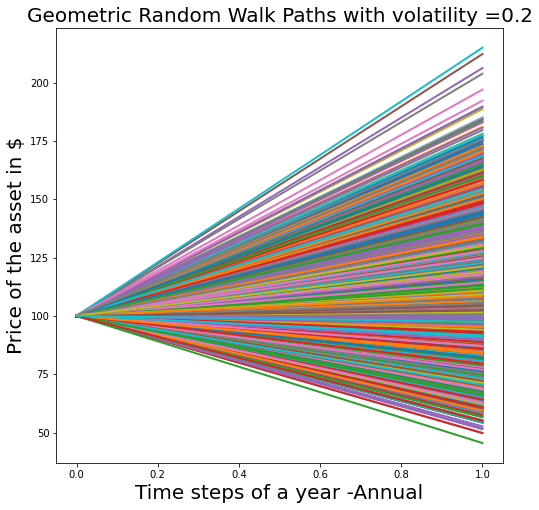

In [0]:
# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step = MC_european_price (S0, K, T, r, mu, sigma, 1, numPaths)

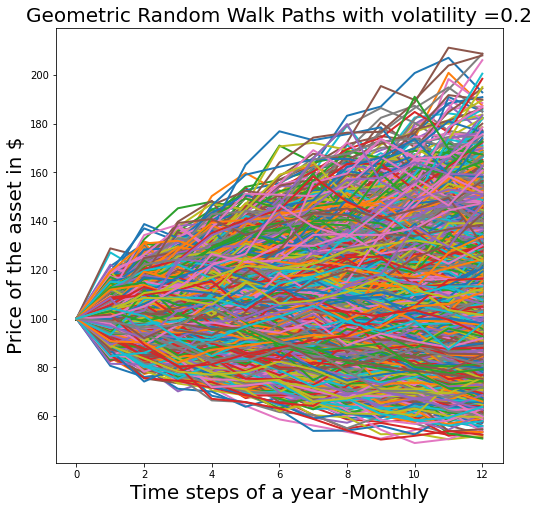

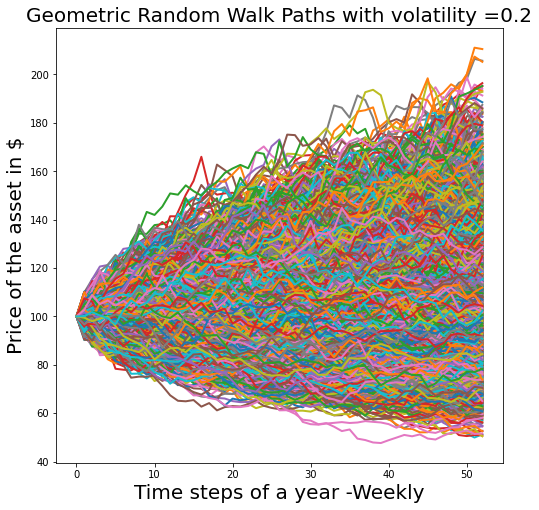

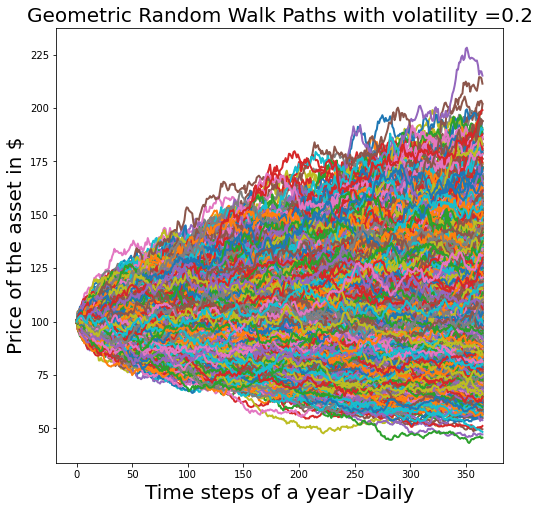

In [0]:
# # Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step=np.zeros((len(numSteps)))
putMC_European_Price_multi_step=np.zeros((len(numSteps)))
for i in range(len(numSteps)):
  callMC_European_Price_multi_step[i], putMC_European_Price_multi_step[i] = MC_european_price (S0, K, T, r, mu, sigma, numSteps[i], numPaths)

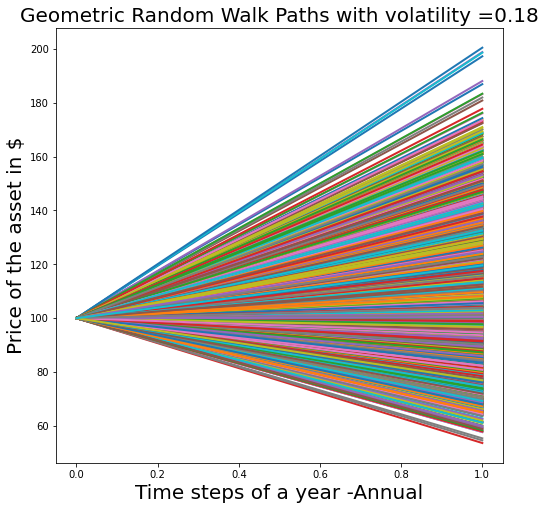

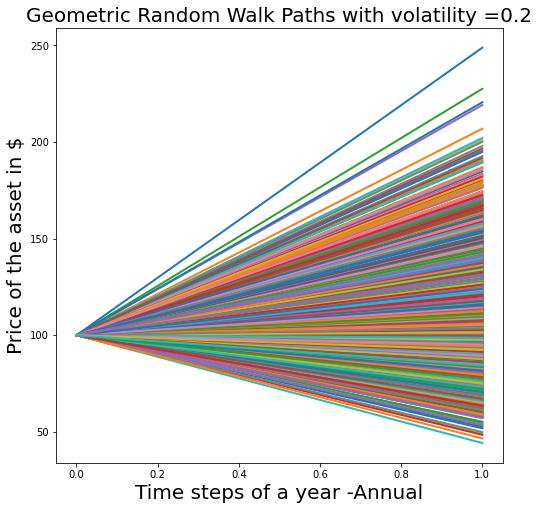

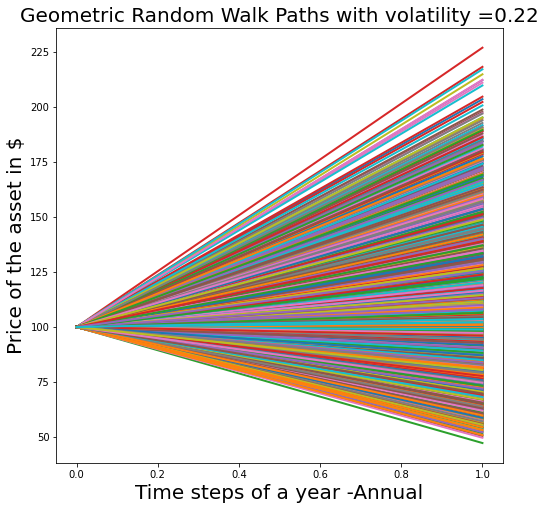

In [0]:
 # Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step=np.zeros((len(sig)))
putMC_Barrier_Knockin_Price_1_step=np.zeros((len(sig)))
for i in range(len(sig)):
  callMC_Barrier_Knockin_Price_1_step[i], putMC_Barrier_Knockin_Price_1_step[i] = MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sig[i], 1, numPaths)

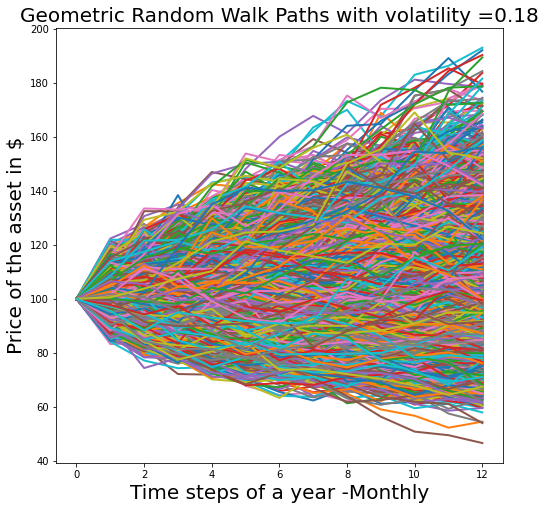

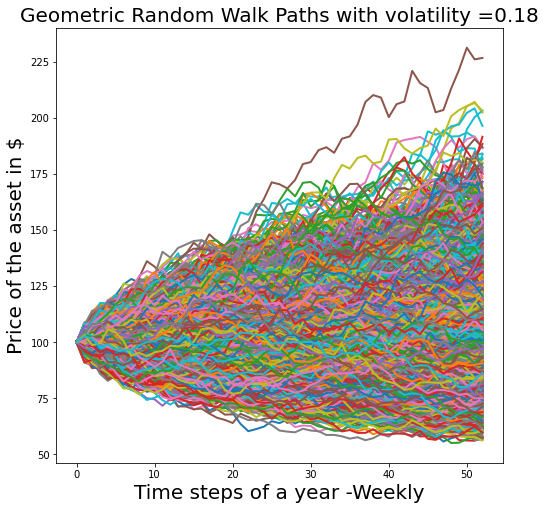

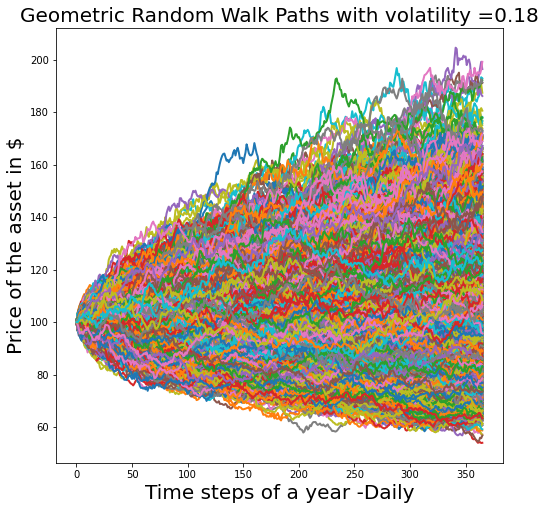

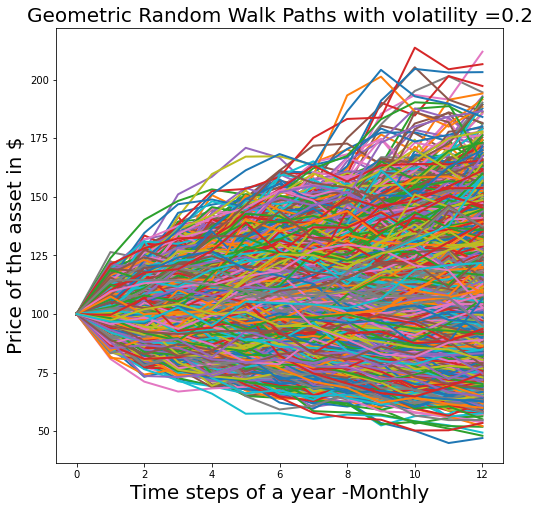

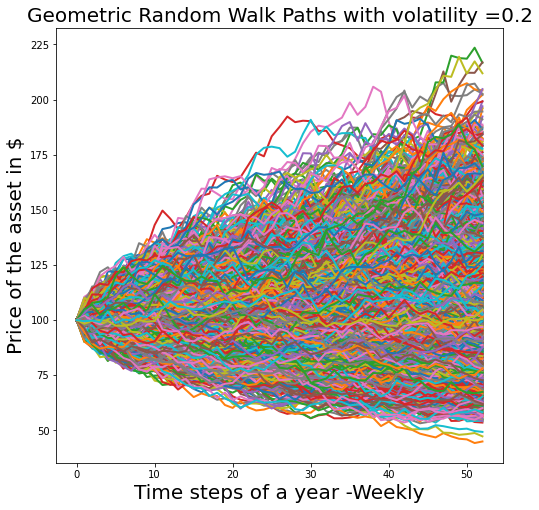

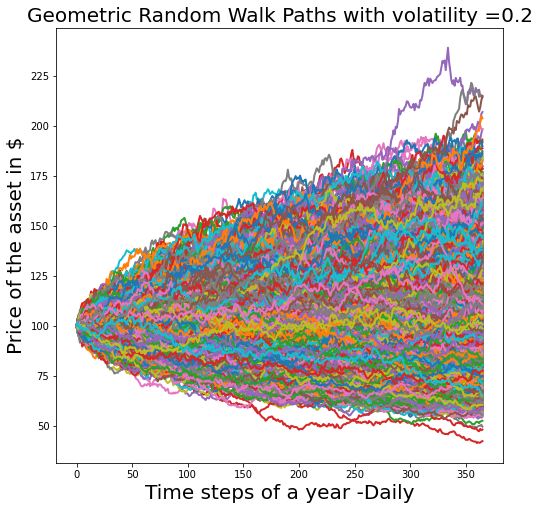

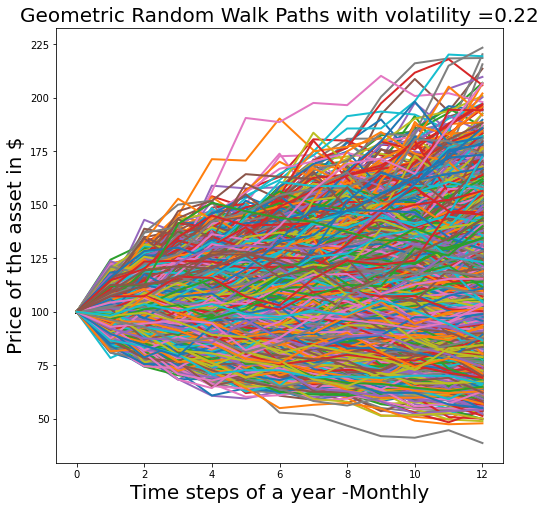

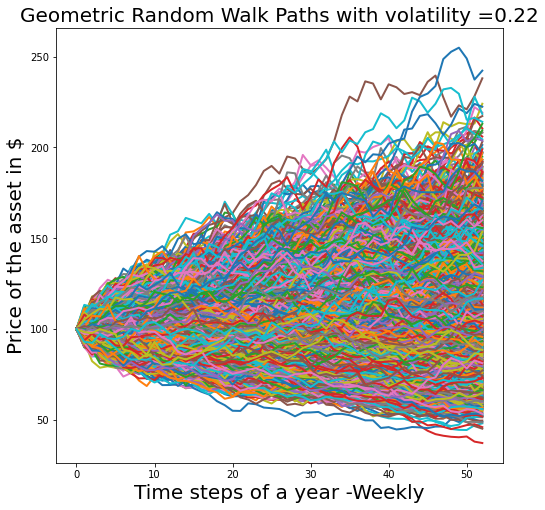

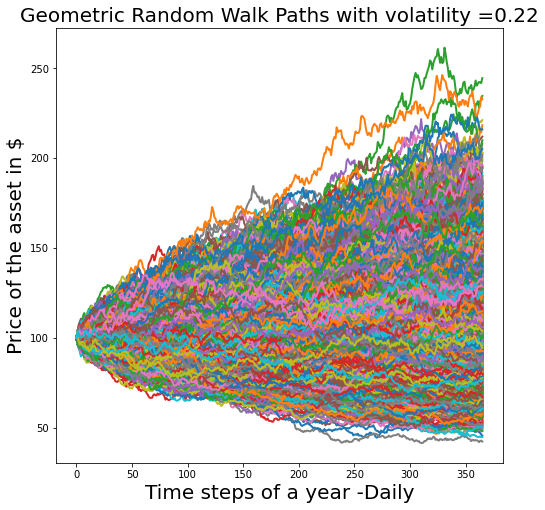

In [0]:
# # Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step=np.zeros((len(sig),len(numSteps)))
putMC_Barrier_Knockin_Price_multi_step= np.zeros((len(sig),len(numSteps)))
for i in range(len(sig)):
  for j in range(len(numSteps)):
    callMC_Barrier_Knockin_Price_multi_step[i,j], putMC_Barrier_Knockin_Price_multi_step[i,j] = MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sig[i], numSteps[j], numPaths)

## Results

( Different steps and volatility values )

In [0]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
for i in range(len(numSteps)):
  print('Multi-step',timetype[i],' MC price of an European call option is ' + str(callMC_European_Price_multi_step[i])) 
  print('Multi-step',timetype[i],' MC price of an European put option is ' + str(putMC_European_Price_multi_step[i]))
for i in range(len(sig)):
  print('One-step MC price of an Barrier call option ( Volatility =',sig[i],') is ' + str(callMC_Barrier_Knockin_Price_1_step[i])) 
  print('One-step MC price of an Barrier put option ( Volatility =',sig[i],') is ' + str(putMC_Barrier_Knockin_Price_1_step[i])) 
for i in range(len(sig)):
  for j in range(len(numSteps)):
    print('Multi-step',timetype[j],' MC price of an Barrier call option ( Volatility=',sig[i],') is ' + str(callMC_Barrier_Knockin_Price_multi_step[i,j])) 
    print('Multi-step',timetype[j],' MC price of an Barrier put option ( Volatility=',sig[i],') is ' + str(putMC_Barrier_Knockin_Price_multi_step[i,j]))


Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.06498599781465
One-step MC price of an European put option is 7.772926677113388
Multi-step Monthly  MC price of an European call option is 8.006168478595335
Multi-step Monthly  MC price of an European put option is 7.779988016120486
Multi-step Weekly  MC price of an European call option is 7.8648095415231865
Multi-step Weekly  MC price of an European put option is 8.029553911608541
Multi-step Daily  MC price of an European call option is 7.976626877319408
Multi-step Daily  MC price of an European put option is 7.922261464281499
One-step MC price of an Barrier call option ( Volatility = 0.18 ) is 7.180197826266562
One-step MC price of an Barrier put option ( Volatility = 0.18 ) is 0.0
One-step MC price of an Barrier call option ( Volatility = 0.2 ) is 7.868407824713511
One-step MC price of an Barrier put

Multi-step MonteCarlo Simualtions for an European Option

In [0]:
for i in range(len(numSteps)):
  print('Multi-step',timetype[i],' MC price of an European call option is ' + str(callMC_European_Price_multi_step[i])) 
  print('Multi-step',timetype[i],' MC price of an European put option is ' + str(putMC_European_Price_multi_step[i]))


Multi-step Monthly  MC price of an European call option is 8.006168478595335
Multi-step Monthly  MC price of an European put option is 7.779988016120486
Multi-step Weekly  MC price of an European call option is 7.8648095415231865
Multi-step Weekly  MC price of an European put option is 8.029553911608541
Multi-step Daily  MC price of an European call option is 7.976626877319408
Multi-step Daily  MC price of an European put option is 7.922261464281499


Different volatilities for One-step Barrier Option

In [0]:
for i in range(len(sig)):
  print('One-step MC price of an Barrier call option (volatility =',sig[i],') is ' + str(callMC_Barrier_Knockin_Price_1_step[i])) 
  print('One-step MC price of an Barrier put option (volatility =',sig[i],') is ' + str(putMC_Barrier_Knockin_Price_1_step[i])) 


One-step MC price of an Barrier call option (volatility = 0.18 ) is 7.180197826266562
One-step MC price of an Barrier put option (volatility = 0.18 ) is 0.0
One-step MC price of an Barrier call option (volatility = 0.2 ) is 7.868407824713511
One-step MC price of an Barrier put option (volatility = 0.2 ) is 0.0
One-step MC price of an Barrier call option (volatility = 0.22 ) is 8.601647200656048
One-step MC price of an Barrier put option (volatility = 0.22 ) is 0.0


Combination of volatilities with Multi-step Barrier Option

In [0]:
for i in range(len(sig)):
  for j in range(len(numSteps)):
    print('Multi-step',timetype[j],' MC price of an Barrier call option (volatility=',sig[i],') is ' + str(callMC_Barrier_Knockin_Price_multi_step[i,j])) 
    print('Multi-step',timetype[j],' MC price of an Barrier put option (volatility=',sig[i],') is ' + str(putMC_Barrier_Knockin_Price_multi_step[i,j]))


Multi-step Monthly  MC price of an Barrier call option (volatility= 0.18 ) is 7.099542224044945
Multi-step Monthly  MC price of an Barrier put option (volatility= 0.18 ) is 1.0151288002263266
Multi-step Weekly  MC price of an Barrier call option (volatility= 0.18 ) is 7.067731221424914
Multi-step Weekly  MC price of an Barrier put option (volatility= 0.18 ) is 1.3004054074160616
Multi-step Daily  MC price of an Barrier call option (volatility= 0.18 ) is 7.09445895713394
Multi-step Daily  MC price of an Barrier put option (volatility= 0.18 ) is 1.6348668702395277
Multi-step Monthly  MC price of an Barrier call option (volatility= 0.2 ) is 7.978870915857776
Multi-step Monthly  MC price of an Barrier put option (volatility= 0.2 ) is 1.315365912053392
Multi-step Weekly  MC price of an Barrier call option (volatility= 0.2 ) is 8.275834671695662
Multi-step Weekly  MC price of an Barrier put option (volatility= 0.2 ) is 1.6934438037239066
Multi-step Daily  MC price of an Barrier call option (

In [0]:
x=pd.DataFrame(callMC_Barrier_Knockin_Price_multi_step,index=sig,columns=timetype)
x.index.name='Volatility'
print('Barrier Knock-in Multi-step Call option price')
x

Barrier Knock-in Multi-step Call option price


Monthly    Weekly     Daily
Volatility                              
0.18        7.099542  7.067731  7.094459
0.20        7.978871  8.275835  7.974251
0.22        8.795555  8.999692  8.839765

In [0]:
y=pd.DataFrame(putMC_Barrier_Knockin_Price_multi_step,index=sig,columns=timetype)
y.index.name='Volatility'
print('Barrier Knock-in Multi-step Put option price')
y

Barrier Knock-in Multi-step Put option price


Monthly    Weekly     Daily
Volatility                              
0.18        1.015129  1.300405  1.634867
0.20        1.315366  1.693444  2.136075
0.22        1.521011  2.172323  2.491748